## Monte Carlo Simulation and the Likelihood Distribution

In [25]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
l = [2.1,4.1,6.1]
np.power(l,2)

array([ 4.41, 16.81, 37.21])

#### First lets start with a coin flips.

The below method should simulate coin flips with a probability of heads given by p

In [27]:
def coinflip(p=0.5):
    value = random.random()
    return value <= p

Flip coin 5 times

In [28]:
flip_value = {0: 'Tails', 1: 'Heads'}
for i in range(5):
    print(f"Coin flipped and came up {flip_value[coinflip()]}")

Coin flipped and came up Heads
Coin flipped and came up Heads
Coin flipped and came up Tails
Coin flipped and came up Heads
Coin flipped and came up Heads


For a fair coin, when we flip a coin many times, the probability of coming up heads or tails is the same. We can plot this distribution as shown below.

In [29]:
def plotdistribution(data, x_pos):
    fig, ax = plt.subplots()
    freqs = np.bincount(data)
    x_range = np.arange(len(x_pos))

    if len(freqs) < len(x_range):
        sz = len(x_range) - len(freqs)
        freqs = np.append(freqs, [0]*sz)

    ax.bar(x_range, freqs, align='center', alpha=0.5)
    ax.set_ylabel('Outcomes')
    ax.set_xticks(x_range)
    ax.set_xticklabels(x_pos)
    ax.set_title('Outcome Distribution')
    ax.yaxis.grid(True)

    # Save the figure and show
    plt.tight_layout()
    #plt.savefig('bar_plot.png')
    plt.show()

We know that for a fair coin the probability for each outcome is 0.5. But if we do not know if the coin is fair or not, we can just flip the coin lots of times. The resulting distribution of observations will give a good estimate of the probability of the coin as shown below. This is essentially Monte Carlo Simulation.

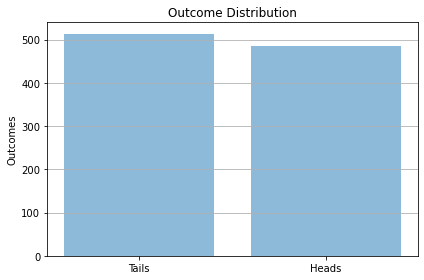

In [30]:
coin_flip_data = np.asarray([coinflip() for x in range(1000)])
plotdistribution(coin_flip_data, ['Tails', 'Heads'])


Above we plotted the distribution for a fair coin. We can similarly plot outcomes for a loaded coin.
For example, for p= 0.3, the outcome distrubiton looks as shown below

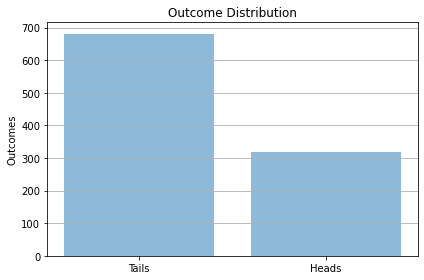

In [31]:
coin_flip_data_1 = np.asarray([coinflip(p=0.3) for x in range(1000)])
plotdistribution(coin_flip_data_1, ['Tails', 'Heads'])

For p=0.7, the outcome distribution looks like this

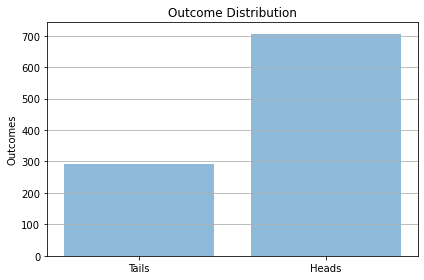

In [32]:
coin_flip_data_2 = np.asarray([coinflip(p=0.7) for x in range(1000)])
plotdistribution(coin_flip_data_2, ['Tails', 'Heads'])

### Joint Probability Distribution

Now if instead of flipping 1 coin, we want to find the probability distribution of 2 coin flips. In that case there are 4 possible outcomes. For a fair coin the outcome distribution will be the joint probability of the 2 coin tosses. The truth table and the associated probability of the outcome is shown below. The probability distribution for p = 0.3 and p = 0.7 is also given.

| Flip 1  | Flip 2 | p = 0.5         | p = 0.3         | p = 0.7       |
|:--------|:-------|:----------------|:----------------|:--------------|
| 0       | 0      | 0.5*0.5 = 0.25  | 0.7*0.7 = 0.49  | 0.3*0.3 = 0.09|
| 0       | 1      | 0.5*0.5 = 0.25  | 0.7*0.3 = 0.21  | 0.3*0.7 = 0.21|
| 1       | 0      | 0.5*0.5 = 0.25  | 0.3*0.7 = 0.21  | 0.7*0.3 = 0.21|
| 1       | 1      | 0.5*0.5 = 0.25  | 0.3*0.3 = 0.18  | 0.7*0.7 = 0.49|

As with the single coin flip, we will use the Monte Carlo simulation to generate the outcome distributions. We sum the values coming from the 2 random flips, and record the frequency of all possible sums.

In [33]:
def coin_flip_sets(num_coin_flips=2, p=0.5, nSamples=100):
    result = np.zeros(shape=(nSamples, num_coin_flips))
    for s in np.arange(nSamples):
        result[s] = [coinflip(p) for x in range(num_coin_flips)]

    return result

Outcome Distribution for 2 coin flips of a fair coin

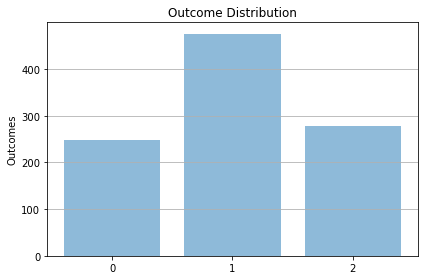

In [34]:
joint_two_flip = coin_flip_sets(nSamples=1000)
plotdistribution(np.sum(joint_two_flip, axis=1, dtype=np.int64), np.arange(3))

Now, we can calculate joint probability of more than 2 coin flips. Below we find the distribution for 30 coin flips with 10000 sample. As can be seen that it is converging to a normal distribution. This is the basis for central limit theorem.

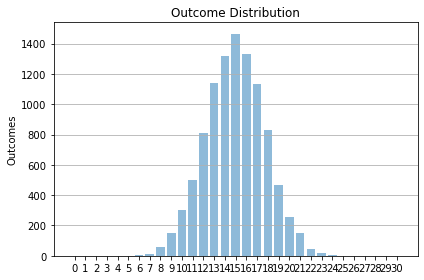

In [35]:
joint_thirty_flip = coin_flip_sets(num_coin_flips=30, nSamples=10000)
plotdistribution(np.sum(joint_thirty_flip, axis=1, dtype=np.int64), np.arange(31))

Similarly, we visualize the distribution for p = 0.3,

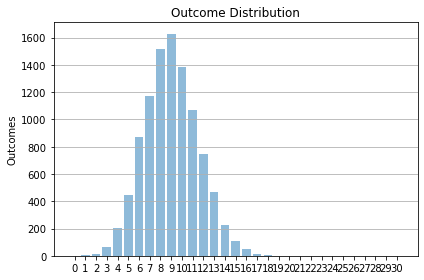

In [36]:
joint_thirty_1_flip = coin_flip_sets(num_coin_flips=30, p = 0.3, nSamples=10000)
plotdistribution(np.sum(joint_thirty_1_flip, axis=1, dtype=np.int64), np.arange(31))

and p = 0.7

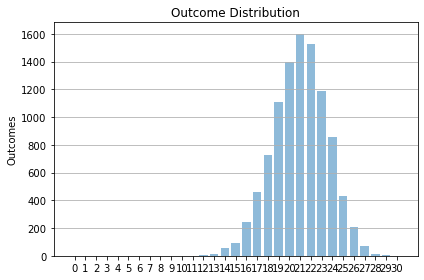

In [37]:
joint_thirty_2_flip = coin_flip_sets(num_coin_flips=30, p = 0.7, nSamples=10000)
plotdistribution(np.sum(joint_thirty_2_flip, axis=1, dtype=np.int64), np.arange(31))

From the plots above it is clear that as p changes, the distribution shifts to the left or to the right. How does the distribution look like for p = 0?

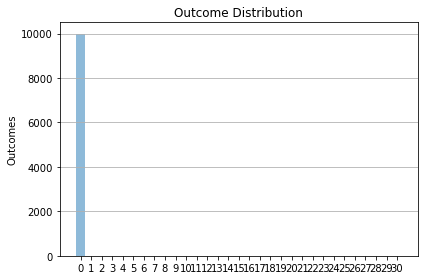

In [38]:
joint_thirty_3_flip = coin_flip_sets(num_coin_flips=30, p = 0, nSamples=10000)
plotdistribution(np.sum(joint_thirty_3_flip, axis=1, dtype=np.int64), np.arange(31))

Finally, the 1 question that remains is which outcome has the maximum frequency of occurence? This can be deduced by taking the mean of the data. Similarly we can also calculate the variance from this data. If we want to represent the distribution in continuous space, we can plug the mean and variance to generate the normal distribution.

In [39]:
print(f"Mean and variance for the outcome distribution with p = 0.5 is {np.mean(np.sum(joint_thirty_flip, axis=1, dtype=np.int64))} and {np.var(np.sum(joint_thirty_flip, axis=1, dtype=np.int64))}")
print(f"Mean and variance for the outcome distribution with p = 0.3 is {np.mean(np.sum(joint_thirty_1_flip, axis=1, dtype=np.int64))} and {np.var(np.sum(joint_thirty_1_flip, axis=1, dtype=np.int64))}")
print(f"Mean and variance for the outcome distribution with p = 0.7 is {np.mean(np.sum(joint_thirty_2_flip, axis=1, dtype=np.int64))} and {np.var(np.sum(joint_thirty_2_flip, axis=1, dtype=np.int64))}")

Mean and variance for the outcome distribution with p = 0.5 is 14.9614 and 7.46291004
Mean and variance for the outcome distribution with p = 0.3 is 9.0143 and 6.29009551
Mean and variance for the outcome distribution with p = 0.7 is 20.9792 and 6.267367360000001


Note that the above distributions visualize the outcome distributions. To get the probability distributions we have to divide by the number of samples. 

Even though I have used the Monte Carlo Simulation to generate the joint probability distributions, there is an anlalytical approach to generate the distributions, which uses the truth table. If we go through the math we arrive at the binomial distribution and the following equation:

    f(y|N,p) = {{N}\choose{y}} . p^y . (1-p)^{N-y}

We can show this to be true using the numpy.random.binomial module. (Added this to show that we do not need to write our own coin flips method)

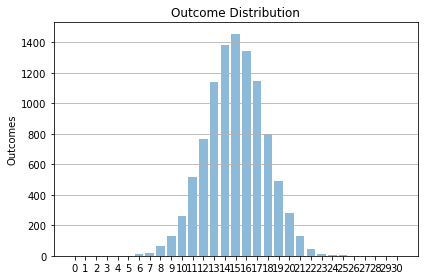

In [40]:
joint_thirty_flip_np = np.random.binomial(30, 0.5, 10000)
plotdistribution(joint_thirty_flip_np, np.arange(31))

To summarize, we take a random variable, and sum many instances of the random variable, and then generate many samples of that experiment. The end result is a distribution that will closely approximate the normal distribution, and the mean of that distribution will be the expected value for that sum. We also showed that it does not matter what the distribution of the random variable is, it will still approximate to the normal distribution, and the expected value being the mean. Additionally, we also estimate the expected probability of the outcomes of the random variable. Note that in this notebook we are only talking about expected probability of outcomes in the context of a random variable taking 2 values only. 

## A Note on Likelihood Distribution

Imagine we encounter a situation that we only have a single sample. How do we find the probability of random variable to generate that sample ? In this case we generate what is called the likelihood distribution and the maximum likelihood estimate. 

Taking the example of a N coin flips, and x out of the N flips result in heads, we generate a likelihood distribution.

In [41]:
def likelihood(nTrials, nSuccess, resolution=100):
    '''
        nTrials is the number of experiments (e.g. number of coin flips)
        nSuccess is the number of success (e.g. number of heads in nTrials)
        returns a likelihood distribution - a dataframe of values for p -> [0,1], where p is the probability of success. 
    '''

    if nSuccess > nTrials:
        return "Wrong Input"

    p_range = np.linspace(0, 1, resolution)
    event_probability = np.multiply(np.power(p_range, nSuccess), np.power((1-p_range), nTrials-nSuccess))
    denom = math.factorial(nTrials-nSuccess)*math.factorial(nSuccess)
    number_of_outcomes = math.factorial(nTrials)/denom
    l = np.multiply(event_probability,number_of_outcomes)
    return pd.DataFrame({'p':p_range, 'likelihood': l})

Plot the likelihood distribution

Maximum likelihood estimate is 0.8333333333333334


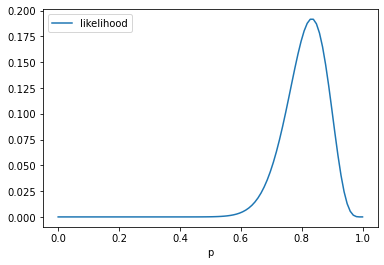

In [42]:
lik_dist = likelihood(30, 25, resolution=100)
#print(lik_dist)
lik_dist.plot(x ='p', y='likelihood', kind = 'line')
print(f"Maximum likelihood estimate is {25/30}")

This is not a normal distribution because of the long tail in the left. Details on this distribution is out of scope for this notebook. 

Below I plot the likelihood distributions for each of each possible value of the joint distribution of 10 trials. I use Altair for the visualization, to make it interactive. Choose the rectangles below to filter the selection.

In [43]:
df = None
for i in range(11):
    dist = likelihood(10, i, resolution=100)
    ID = [i]*100
    dist['ID'] = ID
    #print(dist)

    skip_data = dist.shape[0]
    dist = dist.reset_index().melt(['ID','p'], var_name='category', value_name='signals')
    data = dist[skip_data:]

    if i == 0:
        df = pd.concat([df,data], axis = 1 )
    else:
        df = pd.concat([df,data], axis = 0 )

#print(df)

In [44]:
import altair as alt
# enable the renderer for notebook
#alt.renderers.enable('notebook')

selector = alt.selection_single(empty='none', fields=['ID'])

base = alt.Chart(df).properties(
    width=600,
    height=300
).add_selection(selector)

points = base.mark_rect(filled=True, size=200).encode(
    x='ID:O',
    #y='id:O',
    color=alt.condition(selector, 'ID:O', alt.value('lightgray'), legend=None),
).properties(
    width = 600,
    height = 50
).interactive()

line = base.mark_line(interpolate='monotone').encode(
    x='p:Q',
    y='signals:Q',
).transform_filter(
    selector
)

line & points

alt.VConcatChart(...)